# Lecture 18 - SymPy: Symbols, Expressions, and Equations.

## Overview, Objectives, and Key Terms
 
From [Lecture 1](ME400_Lecture_7.ipynb) through [Lecture 17](ME400_Lecture_17.ipynb), the focus has been squarely on the fundamentals of programming, with some basic numerical tools (like numerical arrays and plotting) and best practices (like unit testing) included along the way.  This lecture marks a transition to new topics that will leverage the material already covered and provide students with tools for solving difficult analytical or numerical problems common to upper-level engineering courses.  In particular, the SymPy module will be used to define *symbols* and *symbolic expressions*, leading to a very different (but very useful) tool for the engineer's toolbox.

### Objectives

By the end of this lesson, you should be able to

- Define symbols and symbolic expressions using SymPy
- Define and solve systems of symbolic equations
- Manipulate expressions by applying simplification and other symbolic tools. 

### Key Terms

- `sympy`
- `sympy.Symbol`
- `sympy.symbols`
- `sympy.init_printing`
- `sympy.solve`
- `sympy.evalf`
- `sympy.simplify`
- `sympy.expand`
- `sympy.collect`

## Symbols 

Symbolic computation, as the name suggests, depends on *symbols*.  Unlike numerical computation, in which one manipulates *values*, symbolic computations involves the manipulation of symbols.  That's just like when you made the jump from grade-school number crunching to algebra for the first time.  Now, we get to do it again (for, I hope, more interesting 
problems and with the help of Python).

Start by importing SymPy (using `sp` as an abbreviation) as follows:

In [1]:
import sympy as sp

A symbol can be defined using the `Symbol` function, whose single argument is a string representing the name of the symbol.  For example, the symbol $x$ can be defined by

In [2]:
x = sp.Symbol('x')
x

x

In [3]:
type(x)

sympy.core.symbol.Symbol

That was easy.  We could do the same thing for $x$, $y$, and $z$, but an all-in-one approach is

In [4]:
x, y, z = sp.symbols('x y z')

SymPy does not require that the string given to `Symbol` or `symbols` matches in any meaningful way to the name to which the symbol is assigned.  For example, one could (but should *not*) do

In [5]:
v = sp.Symbol('u')
v

u

Such naming, of course, could lead to confusion, bugs, etc.

## Nicer Output

When a mathematical symbol is defined, it is often given a special font, e.g., "x" would be typeset as $x$ and not `x`. SymPy provides a way to get nicer output in IPython consoles and Jupyter notebooks.  One just needs to do

In [6]:
sp.init_printing()

Note how the output of `x` changes slightly:

In [7]:
x

This nicely typeset format will be very useful for reading and understanding complex, symbolic expressions.  In fact, it supports some pretty neat formatting features.  For example, a symbol like $x_0$ is often used to represent an initial value for some quantity $x$.  We might express that in Python as `x0` or `x_0`.  In SymPy, both styles work:

In [8]:
x0, y_0 = sp.symbols('x0  y_0')
x0, y_0

Actually, this output not only confirms that subscripts can be formatted as expected, but it shows that SymPy `symbol` can be placed in containers like any other Python type.

## Symbolic Expressions

We can use symbols to define mathematical expressions.  For instance, we know that the total energy of a system is given by its (relativistic) mass times the speed of light squared, i.e.,

In [9]:
m, c = sp.symbols('m c')
m*c**2

Notice that the expression's order was changed.  The particular order of symbols in the stored expression may differ from the expression originally entered. 

When storing expressions, Sympy often performs simplification automatically, e.g.,

In [10]:
x*x*x*x

but not always, e.g.,

In [11]:
x*(x+2)

Just as one can assign the result of evaluated expressions (e.g., `2**3`) to a variable name, so too, can symbolic expressions be assigned.  For example, we can define

In [12]:
E = m*c**2
E

However, now `E` is a symbolic variable (here, a `sympy.core.mul.Mul`, but that's just a detail) and can be manipulated just like any other symbol, e.g., 

In [13]:
E**2

In many cases, we wish to do a sequence of symbolic computations before substituting numerical value.  We know, for example, that the speed of light is about 300 million meters per second, and we can substitute that value in $c$ by

In [14]:
E.subs(c, 3e8)

Note that this does *not* change the original expression:

In [15]:
E

To save the result of the substitution, one needs to assign it to a new name, e.g.,

In [16]:
Esub = E.subs(c, 3e8)
Esub

You may (or may not) recall that the relativistic mass is given
by $m = m_0 / \sqrt{1+(c/v)^2}$, where $m_0$ is the
rest mass of an object and $v$ is the magnitude of its velocity.
We can substitute this, too, via

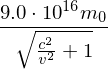

In [17]:
m_0, v = sp.symbols('m_0 v')
E.subs({m:m_0/sp.sqrt(1+(c/v)**2), c:3e8})

Note three things. First, the argument to `E.subs` is a dictionary, with keys equal to the symbols being replaced and values equal to what is being added in place of those keys.  Second, the function `sp.sqrt` has been used.  Only symbolic functions (in the `sympy` module) should generally be used in symbolic expressions.  Third, $c$ appears in the denominator even though we attempted to substitute its numerical value.  The solution is to use *chained substitution*, e.g.,

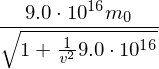

In [18]:
E.subs({m: m_0/sp.sqrt(1+(c/v)**2)}).subs({c: 3e8})

## Symbolic Equations

From above, we saw that symbolic expressions can be assigned to  a name, e.g., $E=mc^2$.  That would, at first glance, appear to be an equation.  However, in the world of SymPy, equations are defined by use of the function $Eq$.  For example,  we could define the following equation:

In [19]:
a, b, x, y = sp.symbols('a b x y')

In [20]:
sp.Eq(a*x, b*y)

and we could actually assign that equation a name via

In [21]:
eq1 = sp.Eq(a*x, b*y)

Suppose we would like to solve for `y` in terms of `x`.  With SymPy, we could do

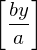

In [22]:
sp.solve(eq1, x)

The result is what we expect, and it is returned as the single element of a list.

If we forgot to specify the variable for which we want a solution, we find

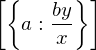

In [23]:
sp.solve(eq1)

Here, the solution is a list also with one element, and that element is a dictionary.  Apparently, `sp.solve` solved for $a$, but why? Consider the following:

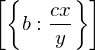

In [24]:
sp.solve(sp.Eq(c*x, b*y))

This suggests (but does not prove) that the solution is by default in alphabetical order, and if one does not specify the variables to solve.  Therefore, a good rule of thumb is always to specify which variable is to be found by `solve`. 

> **Note**: Always specify the names of variables to be solved.

More information can be found on `sp.solve` by calling `help(sp.solve)`.  The output is quite long, but the signature of `sp.solve` is `sp.solve(f, *symbols, **flags)`.  Here, `f` must be (1) one equation (e.g., `sp.Eq(expr1, expr2)`), (2) one symbolic expression `expr` (treated implicitly as `sp.Eq(expr, 0)`, or (3) a sequence (e.g., `list`) of such equations or expressions.  

Notice that `*symbols` and `**flags` have the special `*` and `**` characters discussed in [Lecture 13](ME400_Lecture_13.ipynb).  Convention usually puts `*` with `*args` and `**` with `**kwargs`.  However, the meaning is the same: `*symbols` is a sequence of position arguments that represent the symbols for which the equations are to be solved, while `**flags` are named arguments that (may) modify how `sp.solve` works.

Now, let us define the second equation:

In [25]:
d = sp.Symbol('d')
eq2 = c*x - d*y + 1

which, as you'll note, is just an expression.  When used in  solvers, an expression `expr` is equivalent to the
equation `Eq(expr, 0)`.  We can solve the two equations simultaneously via

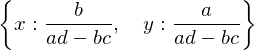

In [26]:
sp.solve([eq1, eq2], x, y)

Go ahead and verify this by hand, and then take a look to the full SymPy tutorial (link below) to check out what sorts of equations (and sets of equations) SymPy can solve.

> **Note**: As with *any* function one uses from SymPy or other modules, make sure that the return value is the expected result (in terms not just of *value* but also *type*.

In order to get comfortable with SymPy and solving symbolic equations, tackle the following:

> **Exercise**: Solve $a x^2 + b x + c = 0$ for $x$, and name the solutions $x_0$ and $x_1$.

> **Exercise**: Solve $e^{ax} = b$ for $x$, and name the solution $x_0$.  Substitute $b = 2$, and name the result $x_1$.

> **Exercise**: Solve $x - y = 1$ and $2x + y = 1$ for $x$ and $y$.

> **Exercise**: Given $3a + 4b + 7c + 11 = 0$, $5a + 3b + 3c + 4 = 0$, and $7a + 13b + 5c + 9=0$, find $a$, $b$, and $c$.

## Numerical Evaluation

The solution of one equation or a system of equations, linear or nonlinear, is generally not the end of one's analysis.  Often, the ultimate goal is to produce a final, numerical answer, with all problem-specific parameters substituted into the final result.

Consider the expression

In [27]:
expr = sp.sin(x**3)
expr

Suppose we substitute $x = 3$, which can be done via

In [28]:
expr_sub = expr.subs({x: 3})
expr_sub

As clean as this is, it's not a *number*.  The trick is to use `evalf`:

In [29]:
expr_sub.evalf()

## Other Symbolic Tools

Consider the following example:

In [30]:
t = sp.Symbol('t')

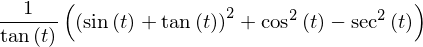

In [31]:
expr = ((sp.sin(t)+sp.tan(t))**2 + sp.cos(t)**2 - sp.sec(t)**2) / sp.tan(t)
expr

Nope. SymPy didn't simplify what looks to be a fairly formidable trigonometric expression.  But then again, we didn't tell it to  do so.  How's this?

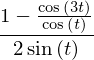

In [32]:
sp.simplify(expr)

That's a bit cleaner.  Exactly what "simplest" means as SymPy does this magic is not really concrete.  In fact, SymPy does simplification via a sort of *heuristic* optimization (an area of active research).

Another way to simplify (at least visually, perhaps) is to `collect` additive terms of some expression.  What does that mean?  Suppose we define

In [33]:
expr = (a*x+b*y)**2*(c*x+d*y)
expr

In [34]:
sp.expand(expr)

where `expand` does exactly what its name suggests: it expands the  product of sums to individual sums.  But gosh, that output is complicated. Suppose we want to group together all terms with like powers of $x$.  That's where `collect` comes in:

In [35]:
sp.collect(sp.expand(expr), x)

With `simplify`, `expand`, and `collect`, one has substantial flexibility in manipulating expressions into forms more easily understood or used.

Finally, it is often the case that we want to visuallize our symbolic results graphically.  How to plot something like $\sin(x)$?  Of course, NumPy has arrays and its own `np.sin(x)` functions, but that will not work if `x` is a symbol.  Fortunately, SymPy has the function `lambdify`, which will turn any symbolic expression into a `lambda` function suitable for numerical evaluations (array-based or otherwise) and, hence, plotting.

For example, convert the expression `f = x**2` into a function:

In [36]:
f = x**2
f_fun = sp.lambdify(x, f)
f_fun(2.0)

Note something important: the original expression was named `f`.  To keep names straight, I recommend naming any *lambdified* expression `f` in the form `f_fun` to indicate its use as a function.

The result works by default for `ndarrays`:

In [37]:
import numpy as np
f_fun(np.array([1,2,3]))

array([1, 4, 9])

Use of `lambdify` is highly recommended for producing plots of symbolic expressions.  For example, the expressions `f = x**2` and `g = x**3` can be plotted as follows (pay close attention to the naming convention and the cool `latex` trick):

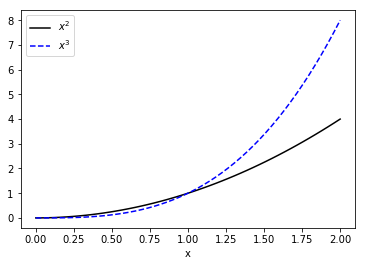

In [38]:
import matplotlib.pyplot as plt
# x is a symbol, but we'll need actual value to 
# plot.  Here, x_plot indicates its purpose as the 
# values of x to be used for plotting.
x_plot = np.linspace(0, 2)
f_plot = f_fun(x_plot) # x**2
g = x**3
g_fun = sp.lambdify(x, g)
g_plot = g_fun(x_plot)
plt.plot(x_plot, f_plot, 'k-', label='${}$'.format(sp.latex(f)))
plt.plot(x_plot,  g_plot, 'b--', label='${}$'.format(sp.latex(g)))
plt.xlabel('x')
plt.legend()
plt.show()

For those curious, here's what that `latex` function does:

In [39]:
sp.latex(f)

'x^{2}'

## Further Reading

Much of what has been covered here is drawn from the [SymPy tutorial](http://docs.sympy.org/latest/tutorial/index.html).  That's a great resource (as is the rest of the [SymPy documentation](http://docs.sympy.org/latest/index.html).  Because SymPy is a relatively young module, you can expect it to be updated rather frequently.